In [ ]:
#https://medium.com/coders-camp/60-python-projects-with-source-code-919cd8a6e512

In [ ]:
#Project 1 - Digital Clock GUI
from tkinter import Label, Tk 
import time

app_window = Tk() 
app_window.title("Digital Clock") 
app_window.geometry("420x150") 
app_window.resizable(1,1)

text_font= ("Boulder", 68, 'bold')
background = "#f2e750"
foreground= "#363529"
border_width = 25
label = Label(app_window, font=text_font, bg=background, fg=foreground, bd=border_width) 
label.grid(row=0, column=1)

def digital_clock(): 
   time_live = time.strftime("%H:%M:%S")
   label.config(text=time_live) 
   label.after(200, digital_clock)

digital_clock()
app_window.mainloop()

In [ ]:
#Project 2 - Get Desktop Notifications with Python
import time
from plyer import notification

if __name__ == "__main__":
    while True:
        notification.notify(
            title = "ALERT!!!",
            message = "Take a break! It has been an hour!",
            timeout = 10
        )
        time.sleep(3600)

In [ ]:
#Project 3 - Use Your Phone Camera for Computer Vision
'''The process of using a phone camera with Python:

First, install the OpenCV library in Python; pip install opencv-python.
Download and install the IP Webcam application on your smartphones.
After installing the IP Webcam app, make sure your phone and PC are connected to the same network. Run the app on your phone and click Start Server.
After that, your camera will open with an IP address at the bottom. Copy the IP address as we will need to use it in our Python code to open your phone’s camera.
Now let’s code to see how to open a phone camera with Python for the tasks of computer vision:
'''
import cv2
import numpy as np
url = "Your IP Address/video"
cp = cv2.VideoCapture(url)
while(True):
    camera, frame = cap.read()
    if frame is not None:
        cv2.imshow("Frame", frame)
    q = cv2.waitKey(1)
    if q==ord("q"):
        break
cv2.destroyAllWindows()

In [13]:
#Project 4 - Music Player GUI
import pygame
import tkinter as tkr
from tkinter.filedialog import askdirectory
import os

music_player = tkr.Tk()
music_player.title("My Music Player")
music_player.geometry("450x350")
directory = askdirectory()
os.chdir(directory)
song_list = os.listdir()

play_list = tkr.Listbox(music_player, font="Helvetica 12 bold", bg='yellow', selectmode=tkr.SINGLE)
for item in song_list:
    pos = 0
    play_list.insert(pos, item)
    pos += 1
pygame.init()
pygame.mixer.init()

def play():
    pygame.mixer.music.load(play_list.get(tkr.ACTIVE))
    var.set(play_list.get(tkr.ACTIVE))
    pygame.mixer.music.play()
def stop():
    pygame.mixer.music.stop()
def pause():
    pygame.mixer.music.pause()
def unpause():
    pygame.mixer.music.unpause()
Button1 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="PLAY", command=play, bg="blue", fg="white")
Button2 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="STOP", command=stop, bg="red", fg="white")
Button3 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="PAUSE", command=pause, bg="purple", fg="white")
Button4 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="UNPAUSE", command=unpause, bg="orange", fg="white")

var = tkr.StringVar() 
song_title = tkr.Label(music_player, font="Helvetica 12 bold", textvariable=var)

song_title.pack()
Button1.pack(fill="x")
Button2.pack(fill="x")
Button3.pack(fill="x")
Button4.pack(fill="x")
play_list.pack(fill="both", expand="yes")
music_player.mainloop()

ModuleNotFoundError: No module named 'pygame'

In [14]:
#Project 5 - Game of Life with Python
class game_of_life:
    def gameOfLife(self, board: List[List[int]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """

        # Neighbors array to find 8 neighboring cells for a given cell
        neighbors = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]

        rows = len(board)
        cols = len(board[0])

        # Create a copy of the original board
        copy_board = [[board[row][col] for col in range(cols)] for row in range(rows)]

        # Iterate through board cell by cell.
        for row in range(rows):
            for col in range(cols):

                # For each cell count the number of live neighbors.
                live_neighbors = 0
                for neighbor in neighbors:

                    r = (row + neighbor[0])
                    c = (col + neighbor[1])

                    # Check the validity of the neighboring cell and if it was originally a live cell.
                    # The evaluation is done against the copy, since that is never updated.
                    if (r < rows and r >= 0) and (c < cols and c >= 0) and (copy_board[r][c] == 1):
                        live_neighbors += 1

                # Rule 1 or Rule 3        
                if copy_board[row][col] == 1 and (live_neighbors < 2 or live_neighbors > 3):
                    board[row][col] = 0
                # Rule 4
                if copy_board[row][col] == 0 and live_neighbors == 3:
                    board[row][col] = 1

NameError: name 'List' is not defined

In [15]:
#Project 6 - Extract Text from videos
import speech_recognition as sr 
import moviepy.editor as mp
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

num_seconds_video= 52*60
print("The video is {} seconds".format(num_seconds_video))
l=list(range(0,num_seconds_video+1,60))

diz={}
for i in range(len(l)-1):
    ffmpeg_extract_subclip("videorl.mp4", l[i]-2*(l[i]!=0), l[i+1], targetname="chunks/cut{}.mp4".format(i+1))
    clip = mp.VideoFileClip(r"chunks/cut{}.mp4".format(i+1)) 
    clip.audio.write_audiofile(r"converted/converted{}.wav".format(i+1))
    r = sr.Recognizer()
    audio = sr.AudioFile("converted/converted{}.wav".format(i+1))
    with audio as source:
      r.adjust_for_ambient_noise(source)  
      audio_file = r.record(source)
    result = r.recognize_google(audio_file)
    diz['chunk{}'.format(i+1)]=result
    
l_chunks=[diz['chunk{}'.format(i+1)] for i in range(len(diz))]
text='\n'.join(l_chunks)

with open('recognized.txt',mode ='w') as file: 
   file.write("Recognized Speech:") 
   file.write("\n") 
   file.write(text) 
   print("Finally ready!")

ModuleNotFoundError: No module named 'speech_recognition'

In [16]:
#Project 7 - Fidget Spinner Game
from turtle import *
state = {'turn': 0}
def spinner():
    clear()
    angle = state['turn']/10
    right(angle)
    forward(100)
    dot(120, 'red')
    back(100)
    right(120)
    forward(100)
    dot(120, 'green')
    back(100)
    right(120)
    forward(100)
    dot(120, 'blue')
    back(100)
    right(120)
    update()
def animate():
    if state['turn']>0:
        state['turn']-=1

    spinner()
    ontimer(animate, 20)
def flick():
    state['turn']+=10

setup(420, 420, 370, 0)
hideturtle()
tracer(False)
width(20)
onkey(flick, 'space')
listen()
animate()
done()


In [19]:
#Project 8 - Spelling Correction with Python
from textblob import TextBlob
words = ["Data Scence", "Mahine Learnin"]
corrected_words = []
for i in words:
    corrected_words.append(TextBlob(i))
print("Wrong words :", words)
print("Corrected Words are :")
for i in corrected_words:
    print(i.correct(), end=" ")
    


Wrong words : ['Data Scence', 'Mahine Learnin']
Corrected Words are :
Data Science Machine Learning 

In [20]:
#Project 9 - Create Amazing Graphics with Python
import turtle as tu

roo = tu.Turtle()  # Turtle object
wn = tu.Screen()  # Screen Object
wn.bgcolor("black")  # Screen Bg color
wn.title("Fractal Tree Pattern")
roo.left(90)  # moving the turtle 90 degrees towards left
roo.speed(20)  # setting the speed of the turtle


def draw(l):  # recursive function taking length 'l' as argument
    if (l < 10):
        return
    else:

        roo.pensize(2)  # Setting Pensize
        roo.pencolor("yellow")  # Setting Pencolor as yellow
        roo.forward(l)  # moving turtle forward by 'l'
        roo.left(30)  # moving the turtle 30 degrees towards left
        draw(3 * l / 4)  # drawing a fractal on the left of the turtle object 'roo' with 3/4th of its length
        roo.right(60)  # moving the turtle 60 degrees towards right
        draw(3 * l / 4)  # drawing a fractal on the right of the turtle object 'roo' with 3/4th of its length
        roo.left(30)  # moving the turtle 30 degrees towards left
        roo.pensize(2)
        roo.backward(l)  # returning the turtle back to its original psition


draw(20)  # drawing 20 times

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor("magenta")  # magenta
        roo.forward(l)
        roo.left(30)
        draw(3 * l / 4)
        roo.right(60)
        draw(3 * l / 4)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(20)

roo.left(270)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor("red")  # red
        roo.forward(l)
        roo.left(30)
        draw(3 * l / 4)
        roo.right(60)
        draw(3 * l / 4)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(20)

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor('#FFF8DC')  # white
        roo.forward(l)
        roo.left(30)
        draw(3 * l / 4)
        roo.right(60)
        draw(3 * l / 4)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(20)


########################################################

def draw(l):
    if (l < 10):
        return
    else:

        roo.pensize(3)
        roo.pencolor("lightgreen")  # lightgreen
        roo.forward(l)
        roo.left(30)
        draw(4 * l / 5)
        roo.right(60)
        draw(4 * l / 5)
        roo.left(30)
        roo.pensize(3)
        roo.backward(l)


draw(40)

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(3)
        roo.pencolor("red")  # red
        roo.forward(l)
        roo.left(30)
        draw(4 * l / 5)
        roo.right(60)
        draw(4 * l / 5)
        roo.left(30)
        roo.pensize(3)
        roo.backward(l)


draw(40)

roo.left(270)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(3)
        roo.pencolor("yellow")  # yellow
        roo.forward(l)
        roo.left(30)
        draw(4 * l / 5)
        roo.right(60)
        draw(4 * l / 5)
        roo.left(30)
        roo.pensize(3)
        roo.backward(l)


draw(40)

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(3)
        roo.pencolor('#FFF8DC')  # white
        roo.forward(l)
        roo.left(30)
        draw(4 * l / 5)
        roo.right(60)
        draw(4 * l / 5)
        roo.left(30)
        roo.pensize(3)
        roo.backward(l)


draw(40)


########################################################
def draw(l):
    if (l < 10):
        return
    else:

        roo.pensize(2)
        roo.pencolor("cyan")  # cyan
        roo.forward(l)
        roo.left(30)
        draw(6 * l / 7)
        roo.right(60)
        draw(6 * l / 7)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(60)

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor("yellow")  # yellow
        roo.forward(l)
        roo.left(30)
        draw(6 * l / 7)
        roo.right(60)
        draw(6 * l / 7)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(60)

roo.left(270)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor("magenta")  # magenta
        roo.forward(l)
        roo.left(30)
        draw(6 * l / 7)
        roo.right(60)
        draw(6 * l / 7)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(60)

roo.right(90)
roo.speed(2000)


# recursion
def draw(l):
    if (l < 10):
        return
    else:
        roo.pensize(2)
        roo.pencolor('#FFF8DC')  # white
        roo.forward(l)
        roo.left(30)
        draw(6 * l / 7)
        roo.right(60)
        draw(6 * l / 7)
        roo.left(30)
        roo.pensize(2)
        roo.backward(l)


draw(60)
wn.exitonclick()

Terminator: 

In [21]:
#Project 10 - Monty Hall Simulator
import random
from random import seed, randint
import numpy

def game(winningdoor, selecteddoor, change=False):
    assert winningdoor < 3
    assert winningdoor >= 0

    # Presenter removes the first door that was not selected neither winning
    removeddoor = next(i for i in range(3) if i != selecteddoor and i != winningdoor)

    # Player decides to change its choice
    if change:
        selecteddoor = next(i for i in range(3) if i != selecteddoor and i != removeddoor)

    # We suppose the player never wants to change its initial choice.
    return selecteddoor == winningdoor


if __name__ == '__main__':
    playerdoors = numpy.random.random_integers(0,2, (1000 * 1000 * 1,))

    winningdoors = [d for d in playerdoors if game(1, d)]
    print("Winning percentage without changing choice: ", len(winningdoors) / len(playerdoors))

    winningdoors = [d for d in playerdoors if game(1, d, change=True)]
    print("Winning percentage while changing choice: ", len(winningdoors) / len(playerdoors))

C:\Users\shahzad.ahmed1\AppData\Local\Temp\ipykernel_16104\2943523626.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  playerdoors = numpy.random.random_integers(0,2, (1000 * 1000 * 1,))


Winning percentage without changing choice:  0.33233
Winning percentage while changing choice:  0.66767


In [23]:
#Project 11 - Video to Audio Converter
from pytube import YouTube
import pytube
import os

def main():
    video_url = input('Enter YouTube video URL: ')

    if os.name == 'nt':
        path = os.getcwd() + '\\'
    else:
        path = os.getcwd() + '/'

    name = pytube.extract.video_id(video_url)
    YouTube(video_url).streams.filter(only_audio=True).first().download(filename=name)
    location = path + name + '.mp4'
    renametomp3 = path + name + '.mp3'

    if os.name == 'nt':
        os.system('ren {0} {1}'. format(location, renametomp3))
    else:
        os.system('mv {0} {1}'. format(location, renametomp3))
    
if __name__ == '__main__':
    main()

Enter YouTube video URL: https://www.youtube.com/watch?v=uVOb3WrFzC0


In [1]:
#Project 12 - Tic Tac Toe GUI
from tkinter import *
import numpy as np

size_of_board = 600
symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
symbol_thickness = 50
symbol_X_color = '#EE4035'
symbol_O_color = '#0492CF'
Green_color = '#7BC043'


class Tic_Tac_Toe():
    # ------------------------------------------------------------------
    # Initialization Functions:
    # ------------------------------------------------------------------
    def __init__(self):
        self.window = Tk()
        self.window.title('Tic-Tac-Toe')
        self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
        self.canvas.pack()
        # Input from user in form of clicks
        self.window.bind('<Button-1>', self.click)

        self.initialize_board()
        self.player_X_turns = True
        self.board_status = np.zeros(shape=(3, 3))

        self.player_X_starts = True
        self.reset_board = False
        self.gameover = False
        self.tie = False
        self.X_wins = False
        self.O_wins = False

        self.X_score = 0
        self.O_score = 0
        self.tie_score = 0

    def mainloop(self):
        self.window.mainloop()

    def initialize_board(self):
        for i in range(2):
            self.canvas.create_line((i + 1) * size_of_board / 3, 0, (i + 1) * size_of_board / 3, size_of_board)

        for i in range(2):
            self.canvas.create_line(0, (i + 1) * size_of_board / 3, size_of_board, (i + 1) * size_of_board / 3)

    def play_again(self):
        self.initialize_board()
        self.player_X_starts = not self.player_X_starts
        self.player_X_turns = self.player_X_starts
        self.board_status = np.zeros(shape=(3, 3))

    # ------------------------------------------------------------------
    # Drawing Functions:
    # The modules required to draw required game based object on canvas
    # ------------------------------------------------------------------

    def draw_O(self, logical_position):
        logical_position = np.array(logical_position)
        # logical_position = grid value on the board
        # grid_position = actual pixel values of the center of the grid
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_oval(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                outline=symbol_O_color)

    def draw_X(self, logical_position):
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] + symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] - symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)

    def display_gameover(self):

        if self.X_wins:
            self.X_score += 1
            text = 'Winner: Player 1 (X)'
            color = symbol_X_color
        elif self.O_wins:
            self.O_score += 1
            text = 'Winner: Player 2 (O)'
            color = symbol_O_color
        else:
            self.tie_score += 1
            text = 'Its a tie'
            color = 'gray'

        self.canvas.delete("all")
        self.canvas.create_text(size_of_board / 2, size_of_board / 3, font="cmr 60 bold", fill=color, text=text)

        score_text = 'Scores \n'
        self.canvas.create_text(size_of_board / 2, 5 * size_of_board / 8, font="cmr 40 bold", fill=Green_color,
                                text=score_text)

        score_text = 'Player 1 (X) : ' + str(self.X_score) + '\n'
        score_text += 'Player 2 (O): ' + str(self.O_score) + '\n'
        score_text += 'Tie                    : ' + str(self.tie_score)
        self.canvas.create_text(size_of_board / 2, 3 * size_of_board / 4, font="cmr 30 bold", fill=Green_color,
                                text=score_text)
        self.reset_board = True

        score_text = 'Click to play again \n'
        self.canvas.create_text(size_of_board / 2, 15 * size_of_board / 16, font="cmr 20 bold", fill="gray",
                                text=score_text)

    # ------------------------------------------------------------------
    # Logical Functions:
    # The modules required to carry out game logic
    # ------------------------------------------------------------------

    def convert_logical_to_grid_position(self, logical_position):
        logical_position = np.array(logical_position, dtype=int)
        return (size_of_board / 3) * logical_position + size_of_board / 6

    def convert_grid_to_logical_position(self, grid_position):
        grid_position = np.array(grid_position)
        return np.array(grid_position // (size_of_board / 3), dtype=int)

    def is_grid_occupied(self, logical_position):
        if self.board_status[logical_position[0]][logical_position[1]] == 0:
            return False
        else:
            return True

    def is_winner(self, player):

        player = -1 if player == 'X' else 1

        # Three in a row
        for i in range(3):
            if self.board_status[i][0] == self.board_status[i][1] == self.board_status[i][2] == player:
                return True
            if self.board_status[0][i] == self.board_status[1][i] == self.board_status[2][i] == player:
                return True

        # Diagonals
        if self.board_status[0][0] == self.board_status[1][1] == self.board_status[2][2] == player:
            return True

        if self.board_status[0][2] == self.board_status[1][1] == self.board_status[2][0] == player:
            return True

        return False

    def is_tie(self):

        r, c = np.where(self.board_status == 0)
        tie = False
        if len(r) == 0:
            tie = True

        return tie

    def is_gameover(self):
        # Either someone wins or all grid occupied
        self.X_wins = self.is_winner('X')
        if not self.X_wins:
            self.O_wins = self.is_winner('O')

        if not self.O_wins:
            self.tie = self.is_tie()

        gameover = self.X_wins or self.O_wins or self.tie

        if self.X_wins:
            print('X wins')
        if self.O_wins:
            print('O wins')
        if self.tie:
            print('Its a tie')

        return gameover





    def click(self, event):
        grid_position = [event.x, event.y]
        logical_position = self.convert_grid_to_logical_position(grid_position)

        if not self.reset_board:
            if self.player_X_turns:
                if not self.is_grid_occupied(logical_position):
                    self.draw_X(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = -1
                    self.player_X_turns = not self.player_X_turns
            else:
                if not self.is_grid_occupied(logical_position):
                    self.draw_O(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = 1
                    self.player_X_turns = not self.player_X_turns

            # Check if game is concluded
            if self.is_gameover():
                self.display_gameover()
                # print('Done')
        else:  # Play Again
            self.canvas.delete("all")
            self.play_again()
            self.reset_board = False


game_instance = Tic_Tac_Toe()
game_instance.mainloop()


X wins
X wins


In [4]:
#Project 13 - Calculator GUI
from kivy.app import App
from kivy.uix.button import Button
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.gridlayout import GridLayout
from kivy.uix.label import Label

class myApp(App):
    def build(self):
        root_widget = BoxLayout(orientation='vertical')
        output_label = Label(size_hint_y = 0.75, font_size=50)
        button_symbols = ('1', '2', '3', '+',
                          '4', '5', '6', '-',
                          '7', '8', '9', '.',
                          '0', '*', '/', '=')
        button_grid = GridLayout(cols=4, size_hint_y=2)
        for symbol in button_symbols:
            button_grid.add_widget(Button(text=symbol))

        clear_button = Button(text = 'Clear', size_hint_y=None, height=100)
        def print_button_text(instance):
            output_label.text += instance.text
        for button in button_grid.children[1:]:
            button.bind(on_press=print_button_text)
        def resize_label_text(label, new_height):
            label.fontsize = 0.5*label.height
        output_label.bind(height=resize_label_text)

        def evaluate_result(instance):
            try:
                output_label.text = str(eval(output_label.text))
            except SyntaxError:
                output_label.text = 'Python Syntax error!'
        button_grid.children[0].bind(on_press=evaluate_result)

        def clear_label(instance):
            output_label.text = " "
        clear_button.bind(on_press=clear_label)

        root_widget.add_widget(output_label)
        root_widget.add_widget(button_grid)
        root_widget.add_widget(clear_button)
        return root_widget
myApp().run()

[WARNING] [Config      ] Older configuration version detected (0 instead of 24)
[WARNING] [Config      ] Upgrading configuration in progress.
[INFO   ] [Logger      ] Record log in C:\Users\shahzad.ahmed1\.kivy\logs\kivy_22-07-13_0.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.3.2
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.3.1
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.4.5
[INFO   ] [Kivy        ] v2.1.0
[INFO   ] [Kivy        ] Installed at "C:\Users\shahzad.ahmed1\Anaconda3\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\shahzad.ahmed1\Anaconda3\python.exe"
[INFO   ] [Logger      ] Purge log fired. Processing...
[INFO   ] [Logger      ] Purge finished!
[INFO   ] [Factory     ] 189 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil (img_ffpyplayer ignor

 C:\Users\shahzad.ahmed1\Anaconda3\lib\site-packages\PyPDF2\_reader.py:1142: PdfReadWarning: Superfluous whitespace found in object header b'115' b'0'
   warnings.warn(
 C:\Users\shahzad.ahmed1\Anaconda3\lib\site-packages\PyPDF2\_reader.py:1142: PdfReadWarning: Superfluous whitespace found in object header b'114' b'0'
   warnings.warn(
 C:\Users\shahzad.ahmed1\Anaconda3\lib\site-packages\PyPDF2\_reader.py:1142: PdfReadWarning: Superfluous whitespace found in object header b'118' b'0'
   warnings.warn(
 C:\Users\shahzad.ahmed1\Anaconda3\lib\site-packages\PyPDF2\_reader.py:1142: PdfReadWarning: Superfluous whitespace found in object header b'117' b'0'
   warnings.warn(


In [5]:
#Project 14 - Number Guessing Game
# to import random module
import random
# to create a range of random numbers between 1-10
n = random.randrange(1,100)
# to take a user input to enter a number
guess = int(input("Enter any number: "))
while n!= guess: # means if n is not equal to the input guess
    # if guess is smaller than n
    if guess < n:
        print("Too low")
        # to again ask for input
        guess = int(input("Enter number again: "))
    # if guess is greater than n
    elif guess > n:
        print("Too high!")
        # to again ask for the user input
        guess = int(input("Enter number again: "))
    # if guess gets equals to n terminate the while loop
    else:
        break
print("you guessed it right!!")

Enter any number: 55
Too low
Enter number again: 20
Too low
Enter number again: 100
Too high!
Enter number again: 60
Too low
Enter number again: 55
Too low
Enter number again: 50
Too low
Enter number again: 40
Too low
Enter number again: 70
Too low
Enter number again: 80
Too low
Enter number again: 90
Too high!
Enter number again: 85
Too high!
Enter number again: 83
Too high!
Enter number again: 80
Too low
Enter number again: 81
Too low
Enter number again: 83
Too high!
Enter number again: 84
Too high!
Enter number again: 85
Too high!
Enter number again: 82
you guessed it right!!


In [6]:
#Project 15 - Image Converter GUI
import tkinter as tk
from tkinter import filedialog
from PIL import Image

root = tk.Tk()
canvas1 = tk.Canvas(root, width=300, height=250, bg='azure3', relief='raised')
canvas1.pack()

label1 = tk.Label(root, text="Image Converter", bg='azure3')
label1.config(font=('helvetica', 20))
canvas1.create_window(150, 60, window=label1)

def getPNG():
    global im1
    import_file_path = filedialog.askopenfilename()
    im1 = Image.open(import_file_path)

browse_png = tk.Button(text="Select PNG file", command=getPNG, bg="royalblue", fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 130, window=browse_png)

def convert():
    global im1
    export_file_path = filedialog.asksaveasfilename(defaultextension='.jpg')
    im1.save(export_file_path)

saveasbutton = tk.Button(text="Convert PNG to JPG", command=convert, bg='royalblue', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 180, window=saveasbutton)
root.mainloop()

In [7]:
#Project 16 - Weight Converter GUI
from tkinter import *
# Creating a GUI Window
window = Tk()
def from_kg():
    gram = float(e2_value.get())*1000
    pound = float(e2_value.get())*2.20462
    ounce = float(e2_value.get())*35.274
    t1.delete("1.0",END)
    t1.insert(END, gram)
    t2.delete("1.0", END)
    t2.insert(END, pound)
    t3.delete("1.0", END)
    t3.insert(END, ounce)

e1 = Label(window, text="Input the weight in KG")
e2_value = StringVar()
e2 = Entry(window, textvariable=e2_value)
e3 = Label(window, text="Gram")
e4 = Label(window, text="Pound")
e5 = Label(window, text="Ounce")

t1 = Text(window, height=5, width=30)
t2 = Text(window, height=5, width=30)
t3 = Text(window, height=5, width=30)

b1 = Button(window, text="Convert", command=from_kg)

e1.grid(row=0, column=0)
e2.grid(row=0, column=1)
e3.grid(row=1, column=0)
e4.grid(row=1, column=1)
e5.grid(row=1, column=2)
t1.grid(row=2, column=0)
t2.grid(row=2, column=1)
t3.grid(row=2, column=2)
b1.grid(row=0, column=2)

window.mainloop()

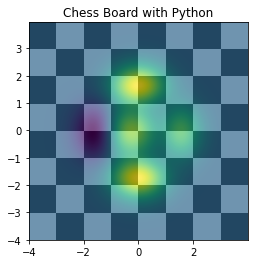

In [8]:
#Project 17 - Visualize a Chess Board with Python
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

dx, dy = 0.015, 0.05
x = np.arange(-4.0, 4.0, dx)
y = np.arange(-4.0, 4.0, dy)
X, Y = np.meshgrid(x, y)
extent = np.min(x), np.max(x), np.min(y), np.max(y)
z1 = np.add.outer(range(8), range(8)) % 2
plt.imshow(z1, cmap="binary_r", interpolation="nearest", extent=extent, alpha=1)

def chess(x, y):
    return (1 - x / 2 + x ** 5 + y ** 6) * np.exp(-(x ** 2 + y ** 2))
z2 = chess(X, Y)
plt.imshow(z2, alpha=0.7, interpolation="bilinear", extent=extent)
plt.title("Chess Board with Python")
plt.show()

In [10]:
#Project 18 - Age and Gender Detection
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"
ageNet = cv.dnn.readNet(ageModel, ageProto)

genderList = ['Male', 'Female']

blob = cv.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
genderNet.setInput(blob)
genderPreds = genderNet.forward()
gender = genderList[genderPreds[0].argmax()]
print("Gender Output : {}".format(genderPreds))
print("Gender : {}".format(gender))

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"
ageNet = cv.dnn.readNet(ageModel, ageProto)

ageList = ['(0 - 2)', '(4 - 6)', '(8 - 12)', '(15 - 20)', '(25 - 32)', '(38 - 43)', '(48 - 53)', '(60 - 100)']

ageNet.setInput(blob)
agePreds = ageNet.forward()
age = ageList[agePreds[0].argmax()]
print("Gender Output : {}".format(agePreds))
print("Gender : {}".format(age))

label = "{}, {}".format(gender, age)
cv.putText(frameFace, label, (bbox[0], bbox[1]-20), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 3, cv.LINE_AA)
cv.imshow("Age Gender Demo", frameFace)

NameError: name 'cv' is not defined

In [12]:
#Project 19 - Bar Code and QR Code Reader
import cv2
from pyzbar import pyzbar

def read_barcodes(frame):
    barcodes = pyzbar.decode(frame)
    for barcode in barcodes:
        x, y , w, h = barcode.rect
        barcode_info = barcode.data.decode('utf-8')
        cv2.rectangle(frame, (x, y),(x+w, y+h), (0, 255, 0), 2)
        
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, barcode_info, (x + 6, y - 6), font, 2.0, (255, 255, 255), 1)
        with open("barcode_result.txt", mode ='w') as file:
            file.write("Recognized Barcode:" + barcode_info)
    return frame

In [19]:
#Project 20 - Create Audiobook with Python
import PyPDF2
pdfReader = PyPDF2.PdfFileReader(open('file.pdf', 'rb'))

import pyttsx3
speaker = pyttsx3.init()

for page_num in range(pdfReader.numPages):
    text =  pdfReader.getPage(page_num).extractText()
    speaker.say(text)
    speaker.runAndWait()
speaker.stop()

engine.save_to_file(text, 'audio.mp3')
engine.runAndWait()

NameError: name 'engine' is not defined

In [20]:
#Project 21 - Face Detection
import cv2
face_cascade = cv2.CascadeClassifier('face_detector.xml')
img = cv2.imread('image.jpg')
faces = face_cascade.detectMultiScale(img, 1.1, 4)

for (x, y, w, h) in faces: 
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.imwrite("face_detected.png", img) 
print('Successfully saved')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [23]:
#Project 22 - Extract Text from PDF
import pdf2image
import os, sys
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

PATH = 'Enter your path'

#initialize the counter that you will use later in your pdf extraction function
i = 1

def delete_ppms():
  for file in os.listdir(PATH):
    if '.ppm' in file or '.DS_Store' in file:
      try:
          os.remove(PATH + file)
      except FileNotFoundError:
          pass
        
pdf_files = []
docx_files = []

# append document names into the lists by their extension type
for f in os.listdir(PATH):
  full_name = os.path.join(PATH, f) 
  if os.path.isfile(full_name):
    name = os.path.basename(f)
    filename, ext = os.path.splitext(name)
    if ext == '.pdf':
      pdf_files.append(name)
    elif ext == ('.docx'):
      docx_files.append(name)
    
def pdf_extract(file, i):
  print("extracting from file:", file)
  delete_ppms()
  images = pdf2image.convert_from_path(PATH + file, output_folder=PATH)
  j = 0
  for file in sorted (os.listdir(PATH)):
      if '.ppm' in file and 'image' not in file:
        os.rename(PATH + file, PATH + 'image' + str(i) + '-' + str(j) + '.ppm')
        j += 1
  j = 0
  f = open(PATH +'result{}.txt'.format(i), 'w')
  files = [f for f in os.listdir(PATH) if '.ppm' in f]

  for file in sorted(files, key=lambda x: int(x[x.index('-') + 1: x.index('.')])):
      temp = pytesseract.image_to_string(Image.open(PATH + file))
      f.write(temp)
  f.close()

for i in range(len(pdf_files)):
  pdf_file = pdf_files[i]
  pdf_extract(pdf_file, i)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Enter your path'

In [24]:
#Project 23 - Card Game using DS and Algo
class Card:
    suits = ["spades",
             "hearts",
             "diamonds",
             "clubs"]
    
    values = [None, None,"2", "3",
              "4", "5", "6", "7",
              "8", "9", "10",
              "Jack", "Queen",
              "King", "Ace"]

    def __init__(self, v, s):
        """suit + value are ints"""
        self.value = v
        self.suit = s

    def __lt__(self, c2):
        if self.value < c2.value:
            return True
        if self.value == c2.value:
            if self.suit < c2.suit:
                return True
            else:
                return False
        return False

    def __gt__(self, c2):
        if self.value > c2.value:
            return True
        if self.value == c2.value:
            if self.suit > c2.suit:
                return True
            else:
                return False
        return False

    def __repr__(self):
        v = self.values[self.value] +\
            " of " + \
            self.suits[self.suit]
        return v

In [25]:
#Project 24 - Web Scrapper with Python
import urllib.request
from bs4 import BeautifulSoup


class Scraper:
    def __init__(self, site):
        self.site = site
        
    def scrape(self):
        r = urllib.request.urlopen(self.site)
        html = r.read()
        
    def scrape(self):
        r = urllib.request.urlopen(self.site)
        html = r.read()
        parser = "html.parser"
        sp = BeautifulSoup(html,parser)
        
    def scrape(self):
        r = urllib.request.urlopen(self.site)
        html = r.read()
        parser = "html.parser"
        sp = BeautifulSoup(html,parser)
        for tag in sp.find_all("a"):
            url = tag.get("href")
            if url is None:
                continue
            if "articles" in url:
                print("\n" + url)
                
import urllib.request
from bs4 import BeautifulSoup


class Scraper:
    def __init__(self, site):
        self.site = site

    def scrape(self):
        r = urllib.request.urlopen(self.site)
        html = r.read()
        parser = "html.parser"
        sp = BeautifulSoup(html,parser)
        for tag in sp.find_all("a"):
            url = tag.get("href")
            if url is None:
                continue
            if "articles" in url:
                print("\n" + url)

news = "https://news.google.com/"
Scraper(news).scrape()


./articles/CAIiEFX1O-PDPSTVGjVygph8mpQqGQgEKhAIACoHCAowu5CGCzDM4IMDMIW7qAc?uo=CAUiU2h0dHBzOi8vd3d3LnRoZW5ld3MuY29tLnBrL2xhdGVzdC85NzMzMTAtd2hhdC1jb3VsZC1iZS1uZXctcGV0cm9sLXByaWNlLWluLXBha2lzdGFu0gEA&hl=en-PK&gl=PK&ceid=PK%3Aen

./articles/CAIiEFX1O-PDPSTVGjVygph8mpQqGQgEKhAIACoHCAowu5CGCzDM4IMDMIW7qAc?uo=CAUiU2h0dHBzOi8vd3d3LnRoZW5ld3MuY29tLnBrL2xhdGVzdC85NzMzMTAtd2hhdC1jb3VsZC1iZS1uZXctcGV0cm9sLXByaWNlLWluLXBha2lzdGFu0gEA&hl=en-PK&gl=PK&ceid=PK%3Aen

./articles/CAIiEFX1O-PDPSTVGjVygph8mpQqGQgEKhAIACoHCAowu5CGCzDM4IMDMIW7qAc?uo=CAUiU2h0dHBzOi8vd3d3LnRoZW5ld3MuY29tLnBrL2xhdGVzdC85NzMzMTAtd2hhdC1jb3VsZC1iZS1uZXctcGV0cm9sLXByaWNlLWluLXBha2lzdGFu0gEA&hl=en-PK&gl=PK&ceid=PK%3Aen

./articles/CBMiUWh0dHBzOi8vd3d3LmRhd24uY29tL25ld3MvMTY5OTIyNC9wbS1zaGVoYmF6LXNlZWtzLXN1bW1hcnktdG8tc2xhc2gtcGV0cm9sLXByaWNlc9IBAA?hl=en-PK&gl=PK&ceid=PK%3Aen

./articles/CBMiUWh0dHBzOi8vd3d3LmRhd24uY29tL25ld3MvMTY5OTIyNC9wbS1zaGVoYmF6LXNlZWtzLXN1bW1hcnktdG8tc2xhc2gtcGV0cm9sLXByaWNlc9IBAA?hl=en-PK&gl=PK&ceid=PK%3Ae

In [26]:
#Project 25 - Create a Pencil Sketch using Python
import cv2
image = cv2.imread("dog.jpg")
cv2.imshow("Dog", image)
cv2.waitKey(0)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("New Dog", gray_image)
cv2.waitKey(0)

inverted_image = 255 - gray_image
cv2.imshow("Inverted", inverted_image)
cv2.waitKey()
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)
cv2.imshow("Sketch", pencil_sketch)
cv2.waitKey(0)

cv2.imshow("original image", image)
cv2.imshow("pencil sketch", pencil_sketch)
cv2.waitKey(0)

-1

In [ ]:
#Project 26 - Text Editor GUI


In [ ]:
#Project 27 - Instagram Filters with Python


In [ ]:
#Project 28 - Count Number of Rainy days in a year


In [ ]:
#Project 29 - Send Emails with Python


In [ ]:
#Project 30 - Image Segmentation


In [ ]:
#Project 31 - OTP Verification System


In [ ]:
#Project 32 - Deploy a Chatbot


In [ ]:
#Project 33 - Create a Telegram Bot


In [ ]:
#Project 34 - Scraping Twitter without API


In [ ]:
#Project 35 - Text to Speech Converter


In [ ]:
#Project 36 - Keyword Research with Python


In [ ]:
#Project 37 - Scrape Wikipedia


In [ ]:
#Project 38 - Web Scraping to create a CSV


In [ ]:
#Project 39 - Scrape Instagram


In [ ]:
#Project 40 - Image Filtering


In [ ]:
#Project 41 - Audio Processing


In [ ]:
#Project 42 - Analog Clock with Python


In [ ]:
#Project 43 - Create a Simple Chatbot


In [ ]:
#Project 44 - Clock APP with Python


In [ ]:
#Project 45 - 3D Graphs


In [ ]:
#Project 46 - Calendar GUI